In [ ]:
# 1. 필요한 모듈을 모두 여기에 기술하세요
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. 데이터를 읽어 데이터프레임으로 저장하세요
df = pd.read_csv('/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/Data/kidiq.csv')

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|kid_score|아이의 시험 점수|
|mom_hs|엄마의 학력|
|mom_iq|엄마의 IQ|
|mom_work|엄마의 일하는 시간|
|mom_age|엄마의 나이|

In [ ]:
# 3. info() 메소드를 사용하여 데이터를 살펴보고 해당 데이터의 특징을 간단하게 적어보세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


* kid_score: null 값없음. int64  
* mom_hs: null 값없음. int64
* mom_iq: null 값없음. float64
* mom_work: null 값없음. int64
* mom_age: null 값없음. int64

In [ ]:
# 4. 데이터프레임의 차원을 확인하세요
df.shape

(434, 5)

In [ ]:
# 5. 결측치 데이터가 있다면 모두 삭제하세요
# 단, 없어도 삭제 코드를 작성하고 실행하세요

df.isna().mean()  # 확인
# 결측치 없음

kid_score    0.0
mom_hs       0.0
mom_iq       0.0
mom_work     0.0
mom_age      0.0
dtype: float64

In [ ]:
# 삭제 코드
df = df.dropna()
df.isna().mean()

kid_score    0.0
mom_hs       0.0
mom_iq       0.0
mom_work     0.0
mom_age      0.0
dtype: float64

In [ ]:
# 6. describe() 메소드를 사용하여 데이터 통계정보를 확인하고 해당 데이터의 특징을 간단하게 적어보세요
df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


### 데이터의 특징:
* kid_score는 점수 분포가 넓고(최소 20, 최대 144), 평균은 86.797235	이다.
* mom_hs는 평균이 0.785714인 것으로 보아 데이터의 상당 부분이 고등학교를 졸업한 엄마들이다.
* mom_iq는 평균이 100이고, 분포는 71.037405에서 138.893106 사이이다.
* mom_work는 1시간에서 4시간 사이의 값을 가진다.
* mom_age는 17에서 29까지 분포하며, 엄마들의 평균 나이는 22.785714 이다.

In [ ]:
# 7. 아래 내용을 확인하고 컬럼을 추가하세요.
# mom_iq_c: 엄마의 전체 IQ평균에서 해당 데이터의 엄마의 IQ의 차를 구해 변수로 만드세요
# mom_age_c: 엄마의 전체 나이평균에서 해당 데이터의 엄마의 나이의 차를 구해 변수로 만드세요

# 엄마의 전체 IQ 평균 구하기
mom_iq_mean = df['mom_iq'].mean()

# 엄마의 전체 나이 평균 구하기
mom_age_mean = df['mom_age'].mean()

# mom_iq_c 컬럼 추가: 엄마의 전체 IQ 평균에서 해당 데이터의 엄마의 IQ의 차
df['mom_iq_c'] = mom_iq_mean - df['mom_iq']

# mom_age_c 컬럼 추가: 엄마의 전체 나이 평균에서 해당 데이터의 엄마의 나이의 차
df['mom_age_c'] = mom_age_mean - df['mom_age']

df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,-21.117529,-4.214286
1,98,1,89.361882,4,25,10.638118,-2.214286
2,85,1,115.443165,4,27,-15.443165,-4.214286
3,83,1,99.449639,3,25,0.550361,-2.214286
4,115,1,92.745710,4,27,7.254290,-4.214286


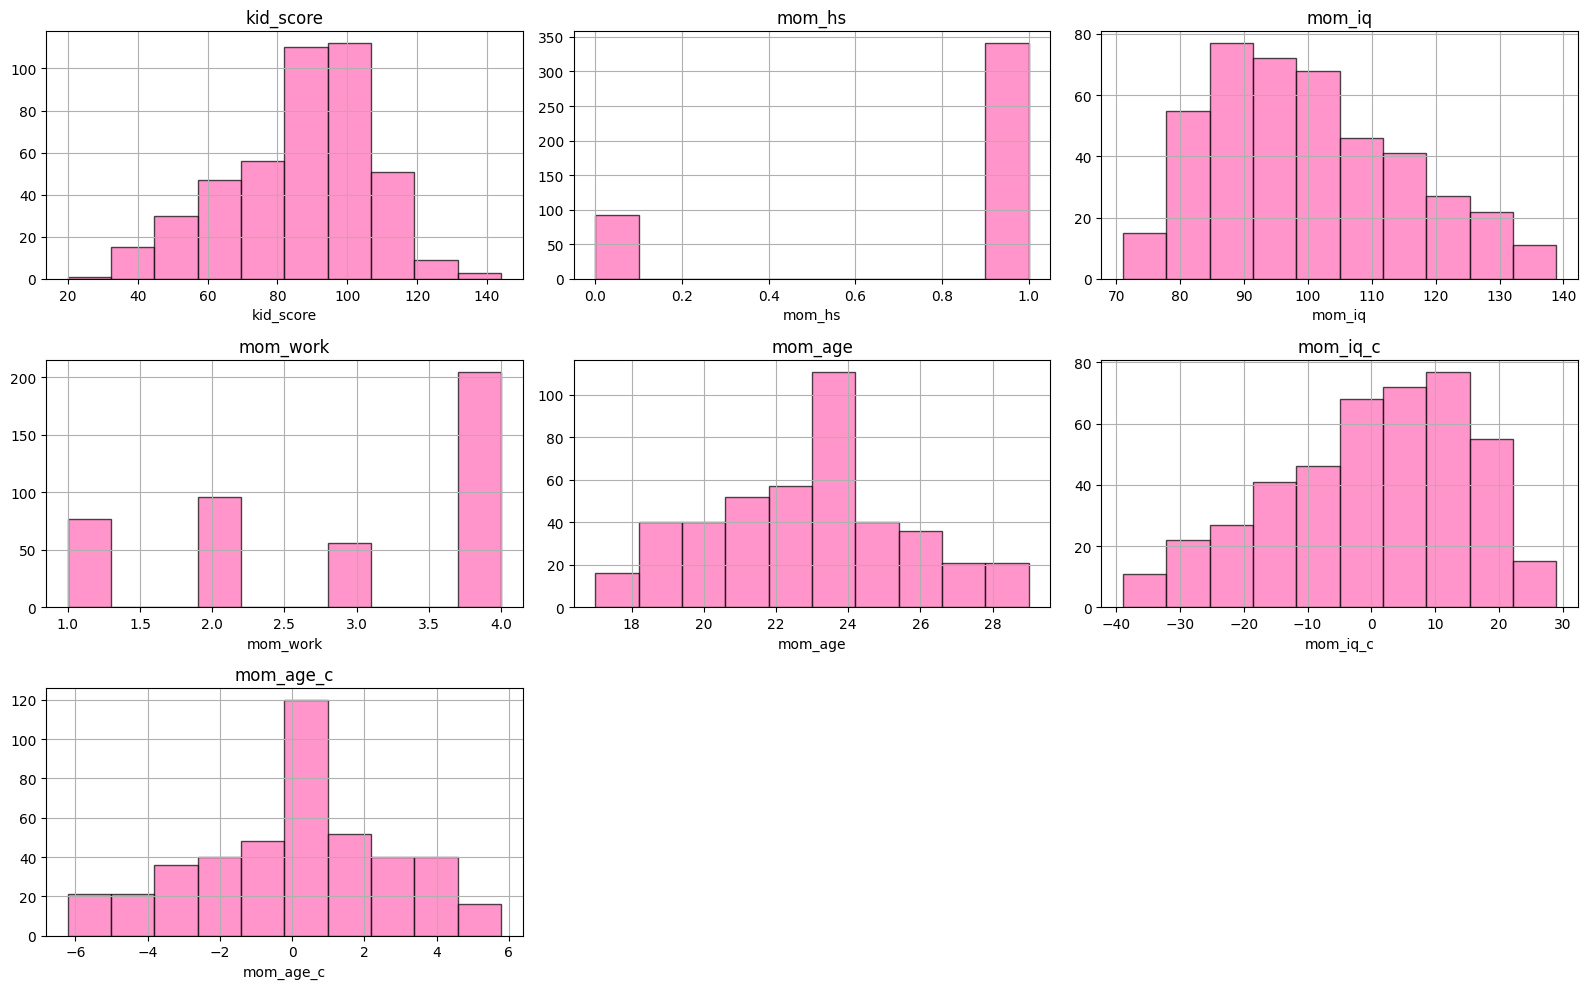

In [ ]:
# 8. 모든 변수에 대해 hist 그래프를 만들고 각 그래프에 따라 insight를 간단히 적어보세요
df = pd.DataFrame(df)

# 히스토그램 그리기
variables = df.columns
plt.figure(figsize=(16, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[var], bins=10, alpha=0.7, color='hotpink', edgecolor='black')
    plt.title(var)
    plt.xlabel(var)
    plt.grid(True)  # 그리드 추가

plt.tight_layout()
plt.show()

* kid_score: 아이의 점수 분포를 확인할 수 있다. 80~100 사이가 많다.
* mom_hs: 어머니의 고등학교 졸업 여부(이진 변수) 분포를 볼 수 있다. 0과 1의 빈도를 비교하고 => 1이 많다.
* mom_iq: 어머니의 IQ 분포를 확인할 수 있다. 약 85~105 사이에 많다.
* mom_work: 1시간에서 4시간 사이의 값을 가진다. 4시간이 가장 많다.
* mom_age: 어머니의 나이 분포를 확인할 수 있다. 17에서 29까지 분포한다. 약 23정도에 가장 많다.  
* mom_iq_c: 중심화된 어머니의 IQ 분포를 확인할 수 있다. 평균 0을 중심으로 한 분포를 본다.
* mom_age_c: 중심화된 어머니의 age 분포를 확인할 수 있다.

In [ ]:
# 9. 독립변수들을 변수 X에 저장하세요
X = df.drop('kid_score', axis=1)
X

,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,1,121.117529,4,27,-21.117529,-4.214286
1,1,89.361882,4,25,10.638118,-2.214286
2,1,115.443165,4,27,-15.443165,-4.214286
3,1,99.449639,3,25,0.550361,-2.214286
4,1,92.745710,4,27,7.254290,-4.214286
...,...,...,...,...,...,...
429,0,84.877412,4,21,15.122588,1.785714
430,1,92.990392,4,23,7.009608,-0.214286
431,0,94.859708,2,24,5.140292,-1.214286
432,1,96.856624,2,21,3.143376,1.785714


In [ ]:
# 10. 종속변수를 y에 저장하세요
y = df['kid_score']
y

0       65
1       98
2       85
3       83
4      115
      ... 
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [ ]:
X_train.shape, X_test.shape

((347, 6), (87, 6))

In [ ]:
y_train.shape, y_test.shape

((347,), (87,))

In [ ]:
# 11. LinearRegression에 대해 간단히 설명하고 독립변수와 종속변수를 넣고 학습하세요
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

### 선형회귀(Linear Regression) 설명
* 데이터를 통해 가장 잘 설명할 수 있는 직선으로 데이터를 분석하는 방법
    * 단순 선형 회귀 분석( 단일 독립변수를 이용 )
    * 다중 선형 회귀 분석( 다중 독립변수를 이용 )
* kid_score가 종속변수, 나머지 독립변수

In [ ]:
# 12. 위 학습된 모델의 W, b, RMSE를 구하세요

# W
W = lr.coef_
print("W:", W)
print('--------------------')

# b
b = lr.intercept_
print("b:", b)
print('--------------------')

# 예측값 계산
y_pred = lr.predict(X_test)

# RMSE 계산
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_lr)

W: [ 5.36622185e+00 -1.99929814e+13  2.81738281e-01  1.12608615e+12
 -1.99929814e+13  1.12608615e+12]
--------------------
b: 1973639460423095.0
--------------------
RMSE: 17.050444933015473


In [ ]:
# 13. 위 결과의 w, b를 이용해 K-Fold(k=5)를 이용하여 RMSE의 평균 값을 확인하세요
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=2024)

# RMSE 값을 저장할 리스트 생성
rmse_list = []

# K-Fold Cross Validation 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습 및 예측
    # lr = LinearRegression()        # 모델 생성
    lr.fit(X_train, y_train)       # 학습
    y_pred = lr.predict(X_test)    # 예측

    # RMSE 계산 및 리스트에 추가
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# RMSE 평균 계산
avg_rmse_k5 = np.mean(rmse_list)
print(f"K-Fold(k=5)를 이용한 평균 RMSE: {avg_rmse_k5}")

K-Fold(k=5)를 이용한 평균 RMSE: 18.257465037019113


In [ ]:
# 14. 독립변수에 가중치(mom_hs * mem_iq_c) 변수를 추가하고 13번에 대해 다시 확인하세요

# mom_hs * mom_iq_c 변수 생성
df['mom_hs_mom_iq_c'] = df['mom_hs'] * df['mom_iq_c']

X = df.drop('kid_score', axis=1)  # kid_score를 제외한 모든 열을 독립변수로 설정
y = df['kid_score']
lr = LinearRegression()

# 다시 확인
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=2024)

# RMSE 값을 저장할 리스트 생성
rmse_list = []

# K-Fold Cross Validation 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습 및 예측
    lr.fit(X_train, y_train)       # 학습
    y_pred = lr.predict(X_test)    # 예측

    # RMSE 계산 및 리스트에 추가
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# RMSE 평균 계산
avg_rmse_new = np.mean(rmse_list)
# print(f"K-Fold Cross Validation을 통한 평균 RMSE: {avg_rmse}")
print(f"새로운 변수 추가 모델 (mom_hs_mom_iq_c)의 평균 RMSE: {avg_rmse_new}")

새로운 변수 추가 모델 (mom_hs_mom_iq_c)의 평균 RMSE: 18.065317143153806


In [ ]:
# 15. 13번, 14번에 대해 결과를 비교하고 다른 결과에 대해 설명하세요
18.257465037019113 - 18.065317143153806   # 기존 - 변수추가

0.1921478938653074

* 13번 (기존 모델) 결과: 평균 RMSE: 18.257465037019113
* 14번 (새로운 변수 추가) 결과: 평균 RMSE: 18.065317143153806
* 기존 모델의 평균 RMSE가 18.257465037019113이고, 새로운 변수를 추가한 모델의 평균 RMSE가 18.065317143153806로 조금 더 낮은 RMSE를 보여준다
* => mom_hs_mom_iq_c를 추가하면서 모델의 성능이 약간 개선
* => 엄마의 교육 수준과 IQ가 아이의 점수에 미치는 효과를 복합적으로 반영

In [ ]:
# 16. 테스트 데이터를 직접작성하여 모델에 데이터를 넣어보세요

# 테스트 데이터 생성
test_data = {
    'mom_hs': [1, 0, 1, 0],
    'mom_iq': [110, 105, 115, 100],
    'mom_work': [3, 2, 4, 1],
    'mom_age': [23, 22, 26, 21]
}

# 테스트 데이터를 데이터프레임으로 변환
df_test = pd.DataFrame(test_data)

# mom_iq_c와 mom_age_c 컬럼 추가
df_test['mom_iq_c'] = mom_iq_mean - df_test['mom_iq']
df_test['mom_age_c'] = mom_age_mean - df_test['mom_age']

# hs_iq_c 파생 변수 추가
df_test['mom_hs_mom_iq_c'] = df_test['mom_hs'] * df_test['mom_iq_c']

# 모델을 사용하여 예측
y_pred_test = lr.predict(df_test)

print("테스트 데이터")
# 예측 결과 출력
for i, pred in enumerate(y_pred_test):
    print(f"테스트 데이터 {i+1}에 대한 예측값: {pred}")

테스트 데이터
테스트 데이터 1에 대한 예측값: 92.5
테스트 데이터 2에 대한 예측값: 95.0
테스트 데이터 3에 대한 예측값: 96.5
테스트 데이터 4에 대한 예측값: 89.0


In [ ]:
# 17. 결정 나무를 이용하여 결과를 보고 LinearRegression의 결과와 비교해보세요.
# 결정 트리 모델 생성
tree_model = DecisionTreeRegressor(random_state=2024)

tree_rmse_list = []

# 모델 학습 및 예측
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# RMSE 계산 및 리스트에 추가
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_rmse_list.append(rmse)

# 결정 트리 모델의 평균 RMSE 계산
avg_rmse_tree = np.mean(tree_rmse_list)
print(f"결정 트리 모델의 평균 RMSE: {avg_rmse_tree}")

결정 트리 모델의 평균 RMSE: 28.575328845083327


In [ ]:
# 테스트 데이터 생성
test_data = {
    'mom_hs': [1, 0, 1, 0],
    'mom_iq': [110, 105, 115, 100],
    'mom_work': [3, 2, 4, 1],
    'mom_age': [23, 22, 26, 21]
}

# 테스트 데이터를 데이터프레임으로 변환
df_test = pd.DataFrame(test_data)

# mom_iq_c와 mom_age_c 컬럼 추가
df_test['mom_iq_c'] = mom_iq_mean - df_test['mom_iq']
df_test['mom_age_c'] = mom_age_mean - df_test['mom_age']

# hs_iq_c 파생 변수 추가
df_test['mom_hs_mom_iq_c'] = df_test['mom_hs'] * df_test['mom_iq_c']

# 모델을 사용하여 예측
y_pred_test_tree = tree_model.predict(df_test)

print("결정 나무를 이용")
# 예측 결과 출력
for i, pred in enumerate(y_pred_test_tree):
    print(f"테스트 데이터 {i+1}에 대한 예측값: {pred}")

결정 나무를 이용
테스트 데이터 1에 대한 예측값: 117.0
테스트 데이터 2에 대한 예측값: 130.0
테스트 데이터 3에 대한 예측값: 136.0
테스트 데이터 4에 대한 예측값: 121.0


In [ ]:
# 18. 결론(부모의 IQ와 아이의 IQ는 연관이 있을까?)에 대해 설명하고 결과를 시각적으로 자료롭게 표현하세요

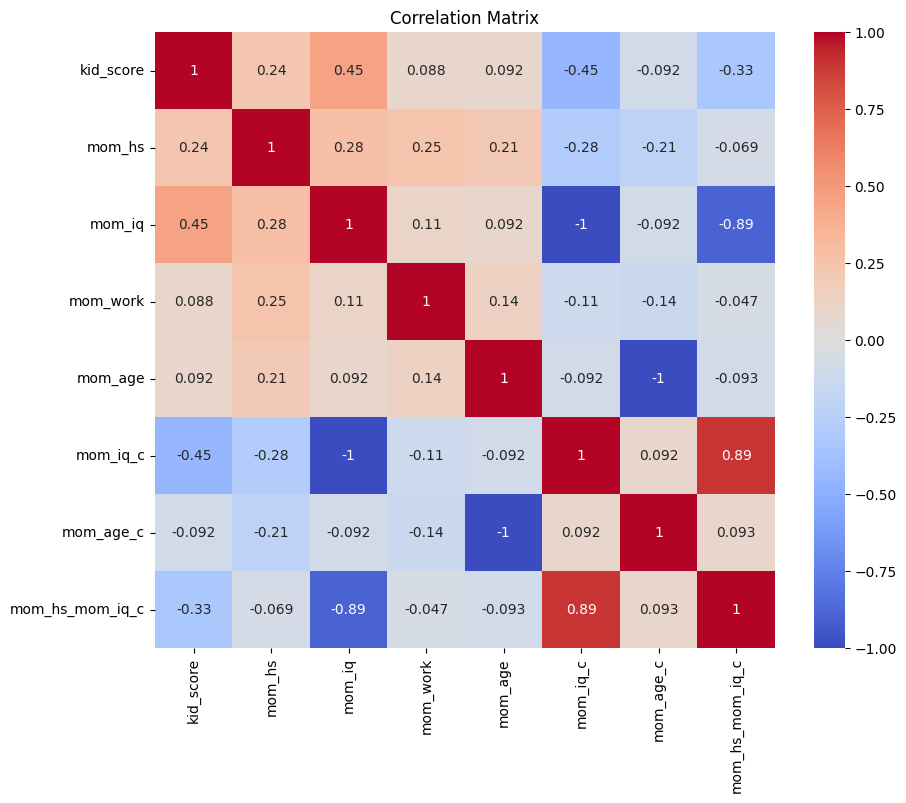

In [ ]:
# 상관 계수 계산
corr_matrix = df.corr()
# Heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### kid_score는 mom_iq와 mom_hs 관련있다.

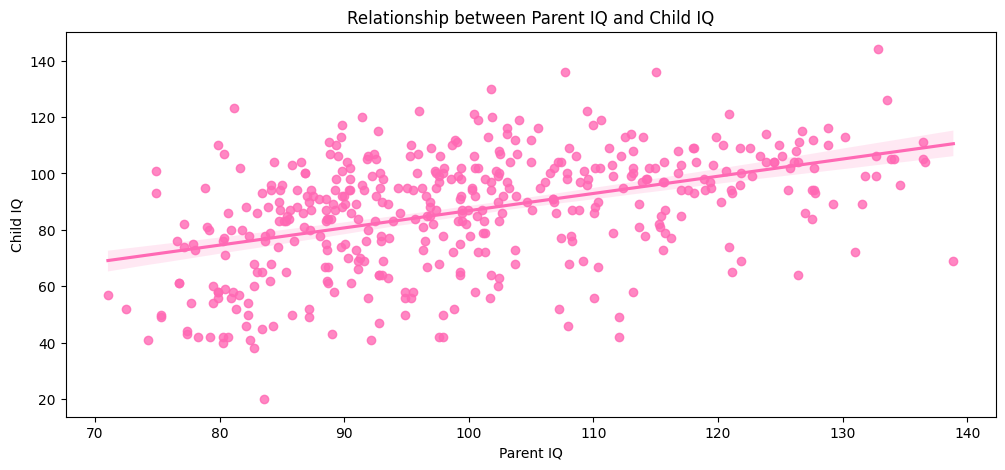

In [ ]:
# 부모 IQ와 아이 IQ의 관계 시각화
plt.figure(figsize=(12, 5))
sns.regplot(x='mom_iq', y='kid_score', data=df, color='hotpink')
plt.title('Relationship between Parent IQ and Child IQ')
plt.xlabel('Parent IQ')
plt.ylabel('Child IQ')
plt.show()

### mom_iq가 높아질수록 kid_score가 높아진다.

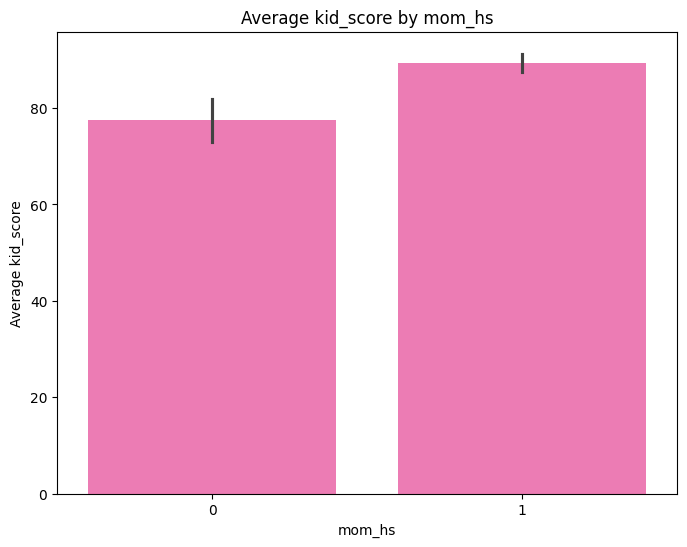

In [ ]:
# kid_score와 mom_hs 간의 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='mom_hs', y='kid_score', data=df, color='hotpink')
plt.title('Average kid_score by mom_hs')
plt.xlabel('mom_hs')
plt.ylabel('Average kid_score')
plt.show()

### 졸업한 엄마의 자녀의 kid_score가 높다.

In [ ]:
# 19. Cross validation은 어떨 때 유의미하게 사용할 수 있는지 설명하세요

### **교차 검증은 데이터가 부족하거나 모델의 일반화 성능을 평가할 때, 과적합 및 과소적합을 방지할 때, 모델 선택 및 하이퍼파라미터 튜닝 시, 그리고 모델 성능을 안정적으로 비교할 때 유용하게 사용할 수 있습니다. 이를 통해 더 신뢰성 있는 모델 평가와 선택이 가능합니다.**

* 1. 데이터가 적을 때:
    * 데이터셋이 작을 때, 데이터를 학습 데이터와 테스트 데이터로 나누는 것이 모델의 일반화 성능을 평가하는데 부족할 수 있습니다. 교차 검증은 데이터를 여러 번 나누어 사용함으로써 더 신뢰성 있는 성능 평가를 제공합니다.
* 2. 모델의 일반화 성능을 평가할 때:
    * 교차 검증은 모델이 새로운 데이터에 대해 얼마나 잘 일반화되는지를 평가하는 데 유용합니다. 여러 번의 학습/테스트 분할을 통해 모델의 평균 성능을 측정함으로써 일반화 성능을 추정할 수 있습니다.
* 3. 과적합 및 과소적합을 방지할 때:
    * 과적합은 모델이 학습 데이터에 너무 맞춰져 새로운 데이터에 대해 성능이 떨어지는 경우를 의미합니다. 교차 검증을 사용하면 모델이 모든 데이터에 대해 학습할 수 있게 되어 과적합을 방지할 수 있습니다.
    * 또한, 여러 번의 훈련과 평가를 통해 과소적합(underfitting) 여부도 확인할 수 있습니다.
* 4. 모델 선택 및 하이퍼파라미터 튜닝 시:
    * 여러 모델 중 최적의 모델을 선택하거나 모델의 하이퍼파라미터를 튜닝할 때 교차 검증을 사용하면 각 모델 및 설정의 성능을 더 정확하게 비교할 수 있습니다.
* 5. 모델의 성능을 안정적으로 비교할 때:
    * 동일한 데이터셋에서 여러 모델을 비교할 때, 교차 검증을 사용하면 각 모델의 성능 변동을 줄이고, 더 일관된 평가를 할 수 있습니다.

In [ ]:
# 20. Cross validation 결과에서 특정 Fold에만 결과가 잘 나오는 경우 어떻게 처리해야 하는지 설명하세요

### **특정 폴드에서만 성능이 잘 나오는 경우, 데이터셋 및 모델의 문제를 검토하고 교차 검증 기법을 변경하거나 앙상블 기법을 사용하는 등의 방법을 고려할 수 있습니다. 이러한 접근법을 통해 더 일관된 모델 성능 평가와 향상을 기대할 수 있습니다.**

* 1. 데이터셋 검토:
    * 데이터 불균형 확인: 데이터셋이 특정 폴드에 치우쳐 있는지 확인합니다. 예를 들어, 특정 폴드에만 중요한 특성이 집중되어 있을 수 있습니다. 이를 해결하기 위해 데이터를 다시 샘플링하거나, 데이터 증강(data augmentation)을 사용할 수 있습니다.
    * 이상치 확인: 특정 폴드에 이상치(outlier)가 포함되어 있는지 확인합니다. 이상치가 모델 성능에 미치는 영향을 줄이기 위해 이상치를 처리하거나 제거합니다.
* 2. 모델 검토:
    * 모델 복잡도 조정: 모델이 너무 복잡하여 특정 폴드에 과적합되었을 수 있습니다. 모델의 복잡도를 줄이거나 정규화(regularization) 기법을 적용하여 과적합을 방지합니다.
    * 하이퍼파라미터 튜닝: 모델의 하이퍼파라미터를 조정하여 폴드 간의 성능 차이를 줄일 수 있습니다.
* 3. Cross-Validation 기법 변경:
    * K-Fold 분할 수 증가: K 값(n_splits)을 증가시켜 더 많은 폴드로 나누어 데이터의 다양한 부분을 평가합니다. 이로 인해 각 폴드에 대한 평가가 더 균일해질 수 있습니다.
    * Stratified K-Fold 사용: 분류 문제의 경우, Stratified K-Fold를 사용하여 각 폴드가 클래스 비율을 유지하도록 합니다.
* 4. 앙상블 기법 사용:
    * 앙상블 기법: 여러 모델의 예측을 결합하여 개별 모델의 과적합 문제를 줄일 수 있습니다. 이로 인해 폴드 간 성능 차이가 완화될 수 있습니다.
* 5. 추가 데이터 수집:
    * 더 많은 데이터 수집: 가능하다면 더 많은 데이터를 수집하여 모델을 학습시키고 평가합니다. 더 큰 데이터셋은 모델이 더 일반화된 성능을 발휘하는 데 도움이 됩니다.